## IMPORT LIBRARY

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import math
import numpy as np

## BUKA GAMBAR

In [2]:

img = Image.open('the_simpsons.jpg')
img = img.convert('RGB')
width, height = img.size

In [3]:
rgb = np.array(img)
rgb

array([[[  9,   0,  57],
        [  9,   0,  57],
        [  9,   0,  57],
        ...,
        [ 14,   0,  61],
        [ 14,   0,  61],
        [ 14,   0,  61]],

       [[  9,   0,  57],
        [  9,   0,  57],
        [  9,   0,  57],
        ...,
        [ 14,   0,  61],
        [ 14,   0,  61],
        [ 14,   0,  61]],

       [[  9,   0,  57],
        [  9,   0,  57],
        [  9,   0,  57],
        ...,
        [ 14,   0,  61],
        [ 14,   0,  61],
        [ 14,   0,  61]],

       ...,

       [[ 50,  21,  67],
        [ 48,  21,  64],
        [ 48,  23,  63],
        ...,
        [164, 151, 181],
        [166, 152, 185],
        [164, 153, 185]],

       [[ 56,  18,  77],
        [ 52,  14,  73],
        [ 48,  12,  73],
        ...,
        [165, 150, 181],
        [167, 152, 185],
        [167, 153, 186]],

       [[ 67,  25,  91],
        [ 66,  25,  93],
        [ 64,  23,  93],
        ...,
        [166, 151, 182],
        [167, 152, 185],
        [168, 153, 186]]

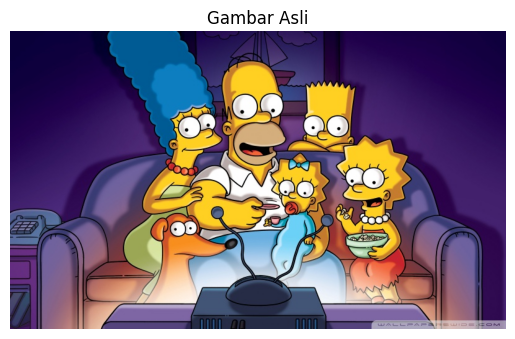

In [4]:
plt.imshow(rgb)
plt.axis('off') 
plt.title('Gambar Asli')
plt.show()

## KONVERSI GRAYSCALE

In [5]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)
    return gray

In [6]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]
        index = convert_to_grayscale(pixel)
        row.append(index)
    grayscale_img.append(row)

grayscale_img = np.array(grayscale_img)
grayscale_img

array([[  9,   9,   9, ...,  11,  11,  11],
       [  9,   9,   9, ...,  11,  11,  11],
       [  9,   9,   9, ...,  11,  11,  11],
       ...,
       [ 34,  33,  35, ..., 158, 159, 159],
       [ 36,  32,  29, ..., 158, 160, 160],
       [ 45,  45,  43, ..., 159, 160, 161]])

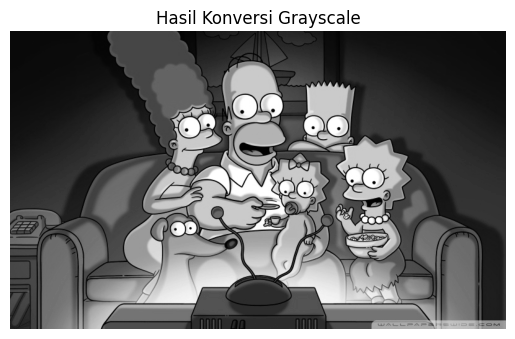

In [7]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Hasil Konversi Grayscale')
plt.show()

## OPERASI PREWITT

#### KERNEL PREWITT

In [8]:
Gx = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]

Gy = [[-1, -1, -1],
      [ 0,  0,  0],
      [ 1,  1,  1]]

#### OPERASI PREWITT

In [9]:
def apply_prewitt_operator(img):
    height, width = img.shape
    gradient_magnitude = np.zeros((height, width))

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0

            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel

            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(magnitude, 255)

    return gradient_magnitude

In [10]:
edges = apply_prewitt_operator(grayscale_img)
edges = np.array(edges)
edges

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 10.81665383, 12.52996409, ..., 10.04987562,
         4.47213595,  0.        ],
       [ 0.        , 32.01562119, 28.28427125, ..., 10.44030651,
         6.40312424,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

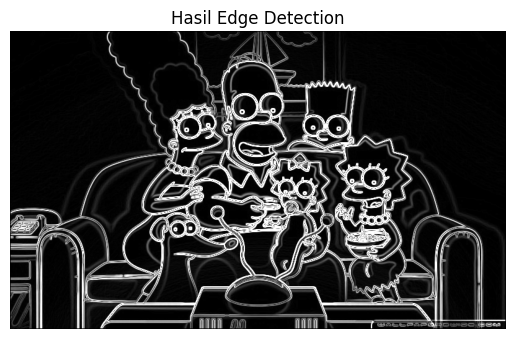

In [11]:
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Hasil Edge Detection')
plt.show()